In [1]:
import numpy as np
import thinkstats2
import thinkplot
import pandas as pd

In [2]:
#QUESTONS
#1 - HOW DOES PLAYER HEIGHT AND TAKING REBOUND CORRALATED?
#2 - HOW DOES COACH OF THE YEAR AND CHAMPIONSHIP AND FINAL 4 CORRALATED?
#3 - HOW DOES USA ORIGINATED PLAYERS AND REST OF THE WORLD'S PLAYERS AND THEIR AVERAGE POINTS IN MATCHES THEY PLAYED CORRALATED?

#I choose first question and the following codes are written for answering that question.

In [45]:
# Here I read the necessery files.
bs_master = pd.read_csv("basketball_master.csv")
bs_players = pd.read_csv("basketball_players.csv")

In [4]:
# I define my dataframes
player_height = bs_master[["bioID","height"]]
rebounds = bs_players[["playerID","GP","rebounds"]]

In [5]:
#Here i remove 0 values from rebounds and heights since older data that i have dont have the records of those data.
valid_rebounds = rebounds[rebounds.rebounds>0]
valid_heights = player_height[player_height.height > 0]

In [6]:
#I sum up all the GP and rebounds values of the same players
valid_rebounds = valid_rebounds.groupby("playerID")["GP","rebounds"].sum()

In [46]:
# Since the two dataframe's playerID segment names are different I made them same for merge.
valid_heights.rename(columns={"bioID":"playerID"}, inplace=True)

In [8]:
# I reset Index here for fixing the errors that I got after sum up.
valid_rebounds = valid_rebounds.reset_index()

In [9]:
# I merged two dataframes
merged_rebound = pd.merge(valid_rebounds,valid_heights)

In [10]:
# I find average rebounds for each player and add it to new column that names avg_rebounds
merged_rebound['avg_rebounds'] = merged_rebound.rebounds / merged_rebound.GP
# I remove ınch value and replace it with cm values of height
merged_rebound["height"] = merged_rebound.height * 2.54

In [11]:
# Average of rebounds
merged_rebound.avg_rebounds.mean()

3.187880243027686

In [12]:
# Median of rebounds
merged_rebound.avg_rebounds.median()

2.5612759822179503

In [13]:
# Variance of rebounds
merged_rebound.avg_rebounds.var()

5.603495261137095

In [14]:
# Deviation of rebounds
merged_rebound.avg_rebounds.std()

2.3671703067453964

In [15]:
# Mode of rebounds
merged_rebound.avg_rebounds.mode()

0    1.0
dtype: float64

In [16]:
# Finding pmf values of both height and average rebounds.
pmf_avg_rebound = thinkstats2.Pmf(merged_rebound.avg_rebounds, label='Average Rebounds')
pmf_height = thinkstats2.Pmf(merged_rebound.height, label='Height')

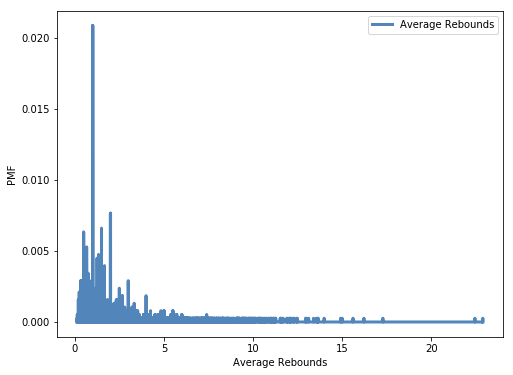

In [17]:
#Plotting Pmf of average rebounds
#I added this preplot line for bigger pictures
thinkplot.PrePlot(2, cols=1)
thinkplot.Pmfs([pmf_avg_rebound])
thinkplot.Config(xlabel='Average Rebounds', ylabel="PMF")

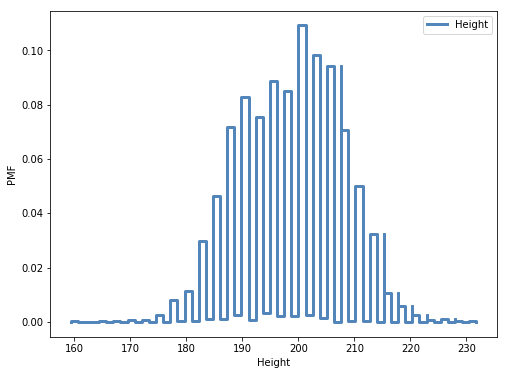

In [18]:
#Plotting Pmf of average Heights
thinkplot.PrePlot(2, cols=1)
thinkplot.Pmfs([pmf_height])
thinkplot.Config(xlabel='Height', ylabel="PMF")

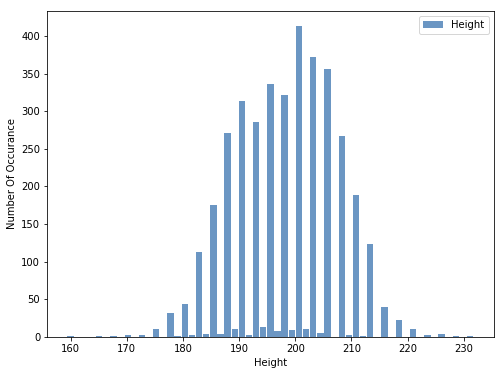

In [19]:
#Finding and plotting histogram of height
avg_height_hist = thinkstats2.Hist(merged_rebound.height, label="Height")
thinkplot.PrePlot(2, cols=1)
thinkplot.Hist(avg_height_hist)
thinkplot.Config(xlabel="Height",ylabel="Number Of Occurance")

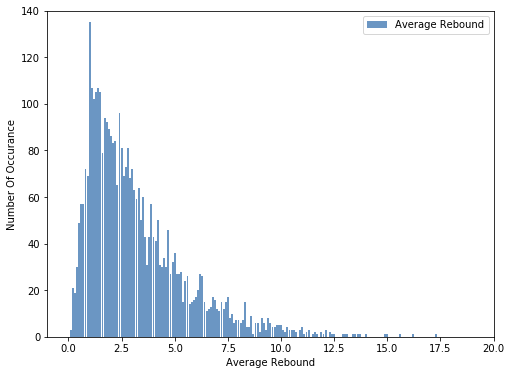

In [20]:
#Here I round up the rebound values to plot
round_rebound = merged_rebound
round_rebound = round_rebound.round({"avg_rebounds":1})

#Here I make histogram and plot the average rebounds
rebound_hist = thinkstats2.Hist(round_rebound.avg_rebounds, label="Average Rebound")
thinkplot.PrePlot(2, cols=1)
thinkplot.Hist(rebound_hist)
thinkplot.Config(xlabel="Average Rebound",ylabel="Number Of Occurance",axis=[-1, 20,0,140])

In [21]:
#Defining cdf's of both height and average rebound value
rebound_cdf = thinkstats2.Cdf(merged_rebound.avg_rebounds, label='Average Rebound')
height_cdf = thinkstats2.Cdf(merged_rebound.height, label='Height')

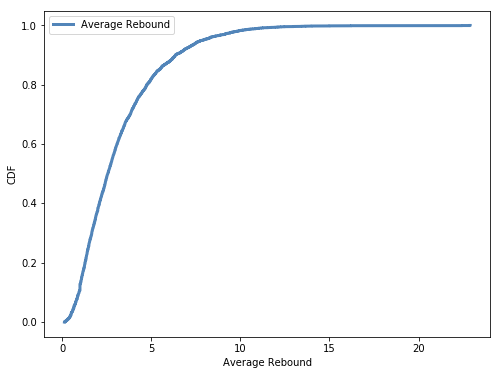

In [22]:
# Here I plot cdf of rebound
thinkplot.PrePlot(2, cols=1)
thinkplot.Cdfs([rebound_cdf])
thinkplot.Config(xlabel='Average Rebound', ylabel='CDF')

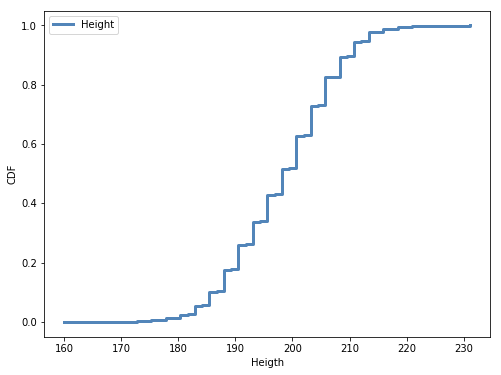

In [23]:
# Here I plot cdf of height
thinkplot.PrePlot(2, cols=1)
thinkplot.Cdfs([height_cdf])
thinkplot.Config(xlabel='Heigth', ylabel='CDF')

In [24]:
#Average of height
merged_rebound.height.mean()

198.33088313061728

In [25]:
#Median of height
merged_rebound.height.median()

198.12

In [26]:
#Variance of height
merged_rebound.height.var()

81.22758953989502

In [27]:
#Deviation of height
merged_rebound.height.std()

9.012634994267493

In [28]:
#Mode of height
merged_rebound.height.mode()

0    200.66
dtype: float64

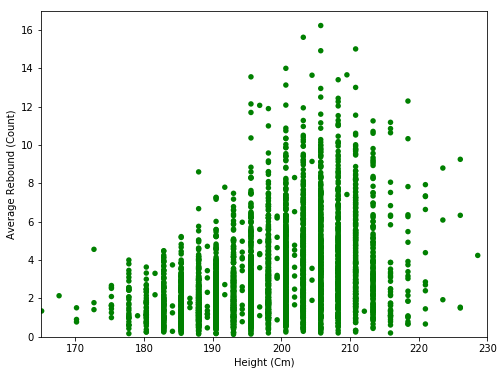

In [29]:
#Scatter plot of height and average rebounds.
thinkplot.Scatter(merged_rebound.height, merged_rebound.avg_rebounds, alpha=1,color='Green')
thinkplot.PrePlot(2, cols=1)
thinkplot.Config(xlabel='Height (Cm)',
                 ylabel='Average Rebound (Count)',
                 axis=[165, 230, 0, 17],
                 legend=False)

In [30]:
#Defining jitter function
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [31]:
#Jittering height
heights = Jitter(merged_rebound.height,1)

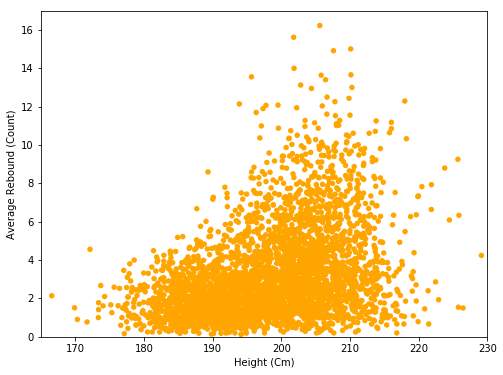

In [32]:
#Plotting again after jittering
thinkplot.Scatter(heights, merged_rebound.avg_rebounds, alpha=1,color='Orange')
thinkplot.PrePlot(2, cols=1)
thinkplot.Config(xlabel='Height (Cm)',
                 ylabel='Average Rebound (Count)',
                 axis=[165, 230, 0, 17],
                 legend=False)

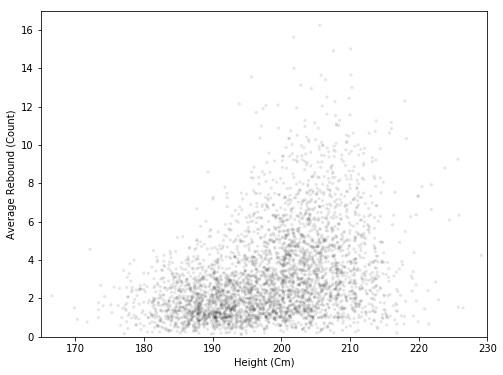

In [57]:
#Filering it with black.
thinkplot.Scatter(heights, merged_rebound.avg_rebounds, alpha=0.1,s=10,color='Black')
thinkplot.PrePlot(2, cols=1)
thinkplot.Config(xlabel='Height (Cm)',
                 ylabel='Average Rebound (Count)',
                 axis=[165, 230, 0, 17],
                 legend=False)

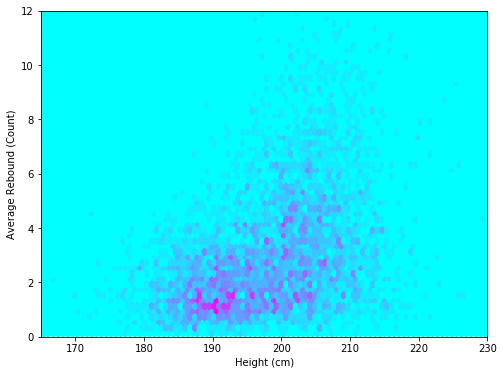

In [34]:
#Hexbin filtering
thinkplot.HexBin(heights, merged_rebound.avg_rebounds, cmap='cool')
thinkplot.PrePlot(2, cols=1)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Average Rebound (Count)',
                 axis=[165, 230, 0, 12],
                 legend=False)

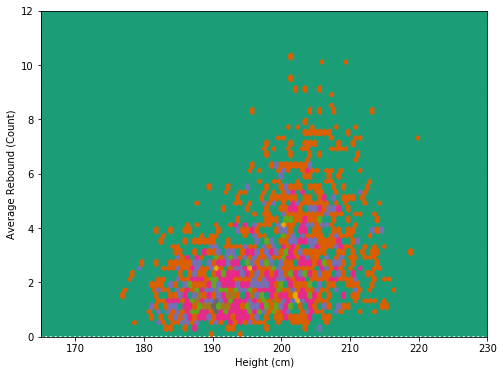

In [35]:
#Hexbin for heatmap values
thinkplot.HexBin(heights, merged_rebound.avg_rebounds, cmap='Dark2')
thinkplot.PrePlot(2, cols=1)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Average Rebound (Count)',
                 axis=[165, 230, 0, 12],
                 legend=False)

In [43]:
#Finding correlation
corr = np.corrcoef(heights, merged_rebound.avg_rebounds)
corr = corr[0][1]
corr

0.3719984364333842

In [44]:
#Finding r-squared
rsquared = corr*corr
round(rsquared,2)

0.14

In [38]:
#Covariance matrix for height and average rebounds
np.cov(heights, merged_rebound.avg_rebounds)

array([[81.9832458 ,  7.97320946],
       [ 7.97320946,  5.60349526]])

In [39]:
#Seeing in which years of data we used for this whole analysis
foryear = bs_players[["playerID","year","GP","rebounds"]]
foryear = foryear[foryear.rebounds>0]
yearmin = foryear.year.min()
yearmax = foryear.year.max()

In [40]:
print "The records of the rebound data that i use are between",yearmin, "and", yearmax

The records of the rebound data that i use are between 1950 and 2011


In [49]:
#Finding average rebounds for only higher than 200 height
height_analyse = merged_rebound[merged_rebound.height > 200]
height_analyse.avg_rebounds.mean()

4.072894401307124